# **This  is a classfication on CIFAR using TF-CNN.**

In [2]:
# Install TensorFlow
!pip install -q tensorflow-gpu==2.0



     |████████████████████████████████| 380.8MB 43kB/s 
     |████████████████████████████████| 450kB 62.1MB/s 
     |████████████████████████████████| 3.8MB 53.8MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.


In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout 
from tensorflow.keras.layers import GlobalMaxPool2D
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170500096/170498071 [==============================] - 2s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [0]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [15]:
# Compile and fit
# Running this on GPUs
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 8s 169us/sample - loss: 0.6041 - accuracy: 0.7860 - val_loss: 0.7986 - val_accuracy: 0.7275
Epoch 2/25
50000/50000 [==============================] - 7s 147us/sample - loss: 0.5913 - accuracy: 0.7911 - val_loss: 0.7867 - val_accuracy: 0.7290
Epoch 3/25
50000/50000 [==============================] - 7s 147us/sample - loss: 0.5686 - accuracy: 0.7965 - val_loss: 0.8012 - val_accuracy: 0.7221
Epoch 4/25
50000/50000 [==============================] - 8s 151us/sample - loss: 0.5550 - accuracy: 0.8027 - val_loss: 0.7825 - val_accuracy: 0.7311
Epoch 5/25
50000/50000 [==============================] - 7s 149us/sample - loss: 0.5443 - accuracy: 0.8067 - val_loss: 0.7866 - val_accuracy: 0.7282
Epoch 6/25
50000/50000 [==============================] - 7s 148us/sample - loss: 0.5285 - accuracy: 0.8133 - val_loss: 0.8036 - val_accuracy: 0.7291
Epoch 7/25
50000/50000 [==========================

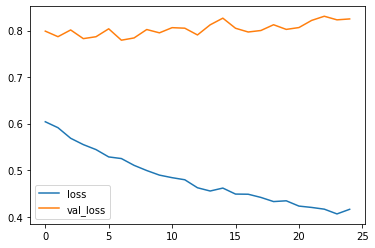

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

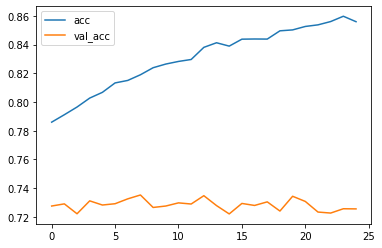

In [17]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[737  20  31  22  15   5  19  11 100  40]
 [ 15 834   2   6   2   3  12   0  31  95]
 [ 62   9 536  53 108  81  94  29  18  10]
 [ 17   6  39 487  81 189  99  37  17  28]
 [ 14   4  46  51 719  25  67  57  12   5]
 [ 10   2  34 146  63 625  44  57   8  11]
 [  5   4  22  42  30  20 859   9   7   2]
 [ 24   3  15  35  66  44  11 779   3  20]
 [ 44  26   5  13   6   5   4   5 860  32]
 [ 36  65   4  15   2   8   9  17  25 819]]


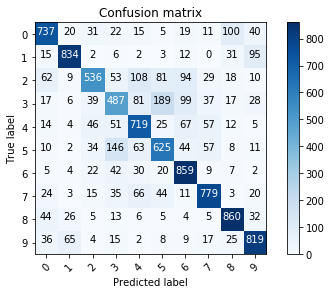

In [18]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [0]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

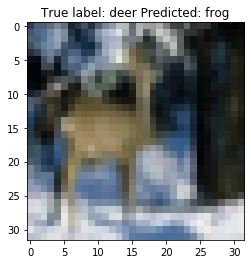

In [25]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              118067

Note that the  number of parameters almost double compared to gray scaled Fashion MNIST data base.

however, the accuracy is low compared. It is about 80% only.

solution is to use normalization layers.

NOTE: When we increased the training iterations, the accuracy did not improve. Moreover, test accuracy remaineded stable and marginally training accuracy improved.